# Classification of MNIST Dataset using MLP

Lets build a MLP with pytorch for image classification

![link text](https://miro.medium.com/max/1080/1*82NoZku9Ki3F-AM6U7TORA.gif)

Author: [Luis Salgueiro](https://imatge.upc.edu/web/people/luis-fernando-salgueiro)

In [ ]:
# Lets do the imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
import time

In [ ]:
# move to GPU
aa = torch.rand(2,2)
print(aa)

aa = aa.to('cuda')
print(aa)

aa = aa.cpu()
print(aa.cpu())

tensor([[0.4153, 0.5615],
        [0.8978, 0.5575]])


RuntimeError: ignored

In [ ]:
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#### We can use tensorflow 
# from tensorflow.keras.datasets import mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()


### We can use scikit-learn as well to fetch the dataset
# mnist = fetch_openml('mnist_784')
# print(mnist)





Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Lets explore a little bit about the dataset
print(mnist_trainset)
print(mnist_trainset.train_data.shape)
print(mnist_trainset.classes)
print(mnist_trainset.class_to_idx)
print(mnist_trainset.train_labels.shape)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
torch.Size([60000, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
print(mnist_testset)
print(mnist_testset.test_data.shape)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
torch.Size([10000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
X_train = mnist_trainset.data
print(X_train.shape)

# toDo: Create the proper tensor
X_test = mnist_testset.data
print(X_test.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
y_train = mnist_trainset.train_labels

# ToDo:  Create a tensor for the labels...
y_test  = mnist_testset.train_labels

print(y_train.shape)
print(y_test.shape)

torch.Size([60000])
torch.Size([10000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)


torch.Size([60000, 784])


In [ ]:
# ToDo reshape
X_test = X_test.reshape(-1,784)
print(X_test.shape)

torch.Size([10000, 784])


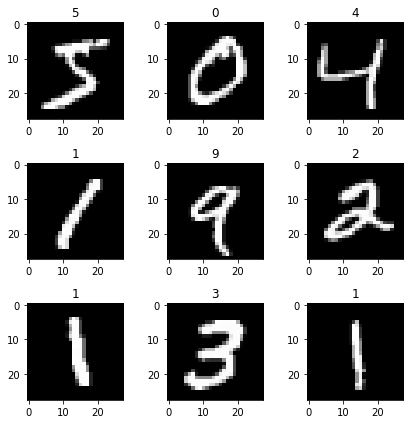

In [ ]:
# from https://juansensio.com/blog/065_transformer_decoder

# Visualize some samples of the dataset

r, c = 3,3
fig = plt.figure(figsize=(c*2,r*2) )
for r_ in range(r):
  for c_ in range(c):
    ix = r_*c + c_ 
    ax = plt.subplot(r,c, ix+1)
    img = X_train[ix]
    label = y_train[ix].numpy()

    ax.imshow(img.reshape(28,28),cmap='gray')
    ax.set_title(
        str(label))
plt.tight_layout()
plt.show()

# Lets create our Dataset Class for the MNIST

In [ ]:
print(y_train.shape)
y_train2 = y_train.reshape(-1,1)
# ToDo
y_test2 = y_train.reshape(-1,1)
print(y_train2.shape)
print(y_test2.shape)

torch.Size([60000])
torch.Size([60000, 1])
torch.Size([60000, 1])


In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self,data, targets):
    self.data  = data
    self.targets = targets

    ## ToDo move to CUDA
    # 
    # 

    print(self.data.shape)
    print(self.targets.shape)

  def __len__(self,):
    return len(self.data)
  
  def __getitem__(self, idx):
    sample = self.data[idx,:]
    target = self.targets[idx]
    
    return {
        'sample': sample.float() ,
        'target': target.long()
    }



In [ ]:
dataset_train = Dataset(data=X_train, targets= y_train)

torch.Size([60000, 784])
torch.Size([60000])


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=128, shuffle=True, num_workers=0)


In [ ]:
for data in train_loader:
  print(data)
  print(data['sample'].shape)
  print(data['target'].shape)
  break

{'sample': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'target': tensor([3, 9, 2, 4, 1, 4, 0, 7, 0, 0, 7, 9, 8, 1, 2, 6, 2, 0, 8, 1, 3, 2, 7, 8,
        0, 6, 7, 7, 5, 8, 1, 2, 7, 5, 4, 3, 6, 5, 2, 1, 4, 7, 7, 5, 1, 0, 3, 8,
        9, 6, 3, 4, 2, 2, 8, 3, 1, 7, 4, 1, 1, 9, 1, 0, 6, 0, 3, 7, 8, 5, 5, 1,
        0, 8, 7, 6, 5, 6, 8, 8, 5, 2, 5, 0, 6, 5, 2, 1, 2, 8, 7, 6, 1, 7, 3, 9,
        1, 8, 3, 0, 7, 2, 6, 8, 1, 8, 5, 3, 1, 3, 6, 3, 3, 0, 2, 9, 1, 2, 3, 3,
        7, 8, 0, 0, 6, 1, 0, 8])}
torch.Size([128, 784])
torch.Size([128])


# Lets define our Multi-Layer Perceptron Model

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000,128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 10),
)
# ToDo
# 

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=1000, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=1000, out_features=128, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=128, out_features=10, bias=True)
)


# TorchSummary
 Torchsummary is another package that helps us to understand a little bit about the model, number of parameters, model-size etc.

In [ ]:
from torchsummary import summary

summary(model, input_size=(1, 784))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1000]         785,000
              ReLU-2              [-1, 1, 1000]               0
            Linear-3               [-1, 1, 128]         128,128
              ReLU-4               [-1, 1, 128]               0
            Linear-5                [-1, 1, 10]           1,290
Total params: 914,418
Trainable params: 914,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.49
Estimated Total Size (MB): 3.51
----------------------------------------------------------------


In [ ]:
# ToDo
learning_rate = 0.001 # ...
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

INIT TRAINING
Trainig 1 EPOCH duration: 314.09450483322144
Trainig 1 EPOCH duration: 629.1282408237457
Trainig 1 EPOCH duration: 945.7822706699371
Trainig 1 EPOCH duration: 1262.7652659416199
Trainig 1 EPOCH duration: 1579.8483629226685
Trainig 1 EPOCH duration: 1896.9750063419342
Trainig 1 EPOCH duration: 2215.1712567806244
Trainig 1 EPOCH duration: 2534.0920429229736
Trainig 1 EPOCH duration: 2854.012668609619
Trainig 1 EPOCH duration: 3175.7904675006866
Epoch: 9, loss: 0.000
Trainig duration: 3175.791044473648


Text(0, 0.5, 'Loss')

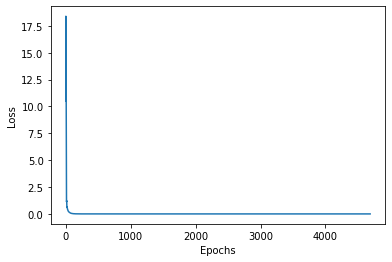

In [ ]:
#ToDo
num_epochs= 10

epoch_loss = []

start = time.time()
print('='*30)
print("INIT TRAINING")

for epoch in range(num_epochs):
  for train_data in train_loader:
    # zero gradients
    optimizer.zero_grad()

    # forward pass
    # ToDo
    y_pred = model(X_test.type(torch.float32))

    loss = criterion(y_pred.squeeze(), y_test)
    
    # Backward pass
    # ToDo
    loss.backward()
    
    epoch_loss.append(loss.item())

    #optimizer step 
    # ToDo
    optimizer.step()

  train_duration = time.time()
  print(f'Trainig 1 EPOCH duration: {train_duration - start}')

    

  if (epoch+1)%10 ==0:
    print(f'Epoch: {epoch}, loss: {loss.item():.3f}')
  # break

end = time.time()

print(f'Trainig duration: {end - start}')
print('='*30)



plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')


# Test Loop

In [ ]:
# ToDo for TestSet
dataset_test = Dataset(data=X_test, targets= y_test)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=25, shuffle=True, num_workers=0)


In [ ]:
for test_data in test_loader:
  
  with torch.no_grad():
      y_pred = model( test_data['sample'] )
  _, predicted = torch.max(y_pred.data, 1)
  print(predicted.shape)

  acc = predicted.eq(test_data['target']).sum()
  print(f'Batch Accuracy: {acc.item()/predicted.shape[0]*100}%' )


  # from https://juansensio.com/blog/065_transformer_decoder
  r, c = 4,4
  fig = plt.figure(figsize=(c*2,r*2) )
  for r_ in range(r):
    for c_ in range(c):
      ix = r_*c + c_ 
      ax = plt.subplot(r,c, ix+1)

      img = test_data['sample'][ix].cpu().numpy()
      label = test_data['target'][ix].cpu().numpy()


      pred = predicted[ix].cpu().numpy().item()
      ax.imshow(img.reshape(28,28),cmap='gray')
      ax.set_title( str(pred)+'/'+str(label), color='green' if label==pred else 'red'  )
  plt.tight_layout()
  plt.show()



  break

In [ ]:
correct = 0 
for test_data in test_loader:
  with torch.no_grad():
      y_pred = model( test_data['sample'] )
      
  #ToDo
  # ... 
  correct += predicted.eq(test_data['target'].view_as(predicted)).sum().item()

acc = 100. * correct / len(test_loader.dataset)

print(f' Test set Accuracy: {correct}/{len(test_loader.dataset)}:  {acc :.2f}%' )








 Test set Accuracy: 9181/10000:  (91.81%


References:
- https://www.dezyre.com/article/exploring-mnist-dataset-using-pytorch-to-train-an-mlp/408/
- https://www.youtube.com/watch?v=oWq6aVv5mC8&list=PL98nY_tJQXZln8spB5uTZdKN08mYGkOf2&index=3
- https://www.youtube.com/watch?v=hBv18xsUMRc
- https://www.machinecurve.com/index.php/2020/11/24/one-hot-encoding-for-machine-learning-with-python-and-scikit-learn/
